In [129]:
%reset -f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import sys
import os
import pyprojroot
root=pyprojroot.here()
#sys.path.insert(0,(root / 'py_utils').as_posix())
sys.path.insert(0,root.as_posix())
from pathlib import Path
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy import integrate
from py_utils.excel_functions import get_sheetnames_xlsx
from py_utils.plotting_functions import ts_plot_from_xlsx

## Draft the timeseries plot configuration dictionary

In [144]:
ts_cfg_ = {
    #'respath' : 'D:\\A11650_Coorong_Release\\coorong-barrage-release\\results\\Coorong_Release_Results_20220628',    
    #'resfile' : 'Coorong_Release_Export.xlsx',
    #'outpath' : 'D:\\A11650_Coorong_Release\\coorong-barrage-release\\post_processing\\plots',
    'respath' : 'C:\\Users\\mitchell.baum\\Desktop\\project_tmp\\A11650',
    'resfile' : 'CoorongBarrageRelease_04v2.xlsx',
    'outpath' : 'L:\\A11650.L.iat.CoorongRelease\\05_modelling\\post_processing\\output\\python\\ts_plots\\report',
    'scenarios' : ['Base', '2.3a', '2.3b'],
    'cumulative' : False,
    #'variable' : 'CNL Salinity',
    #'ylabel' : 'Salinity (g/L)',
    #'ylim' : [0, 120] #None
    'variable' : 'CSL Water Level',    
    'ylabel' : 'Water Level (mAHD)',
    'ylim' : None
}
ts_cfg_

{'respath': 'C:\\Users\\mitchell.baum\\Desktop\\project_tmp\\A11650',
 'resfile': 'CoorongBarrageRelease_04v2.xlsx',
 'outpath': 'L:\\A11650.L.iat.CoorongRelease\\05_modelling\\post_processing\\output\\python\\ts_plots\\report',
 'scenarios': ['Base', '2.3a', '2.3b'],
 'cumulative': False,
 'variable': 'CSL Water Level',
 'ylabel': 'Water Level (mAHD)',
 'ylim': None}

## Write the configuration dictionary to a json file

In [145]:
outpath = Path(ts_cfg_.get('outpath'))
outpath.mkdir(exist_ok=True)

ts_cfg_file = ts_cfg_.get('variable').replace(' ','_')+'.json'
with open(outpath / ts_cfg_file,"w") as f:
    ts_cfg_json = json.dumps(ts_cfg_)
    f.write(ts_cfg_json)
    f.close()

with open(outpath / ts_cfg_file) as f:
    ts_cfg = json.load(f)
    f.close()

display(ts_cfg_file)
display(ts_cfg)

'CSL_Water_Level.json'

{'respath': 'C:\\Users\\mitchell.baum\\Desktop\\project_tmp\\A11650',
 'resfile': 'CoorongBarrageRelease_04v2.xlsx',
 'outpath': 'L:\\A11650.L.iat.CoorongRelease\\05_modelling\\post_processing\\output\\python\\ts_plots\\report',
 'scenarios': ['Base', '2.3a', '2.3b'],
 'cumulative': False,
 'variable': 'CSL Water Level',
 'ylabel': 'Water Level (mAHD)',
 'ylim': None}

## Read the excel file

In [146]:
if ('resfile' not in locals()) or (resfile!=ts_cfg.get('resfile')) or (scenarios!=ts_cfg.get('scenarios')):
    respath = Path(ts_cfg.get('respath'))
    resfile = ts_cfg.get('resfile')
    scenarios = ts_cfg.get('scenarios')
    sheets = get_sheetnames_xlsx(respath / resfile)
    sheets = [x for x in sheets if any([y in x for y in scenarios])]
    dat = pd.read_excel(respath / resfile,sheet_name=sheets)

variable = ts_cfg.get('variable')

display(respath / resfile)
display(variable)
display(sheets)

WindowsPath('C:/Users/mitchell.baum/Desktop/project_tmp/A11650/CoorongBarrageRelease_04v2.xlsx')

'CSL Water Level'

['Base', '2.3a Wind Disabled', '2.3b No Wind Drag']

## Plot scenarios

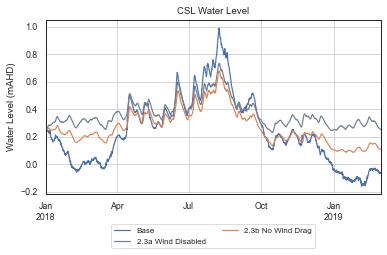

In [147]:
outpath = Path(ts_cfg.get('outpath'))
outpath.mkdir(exist_ok=True)
outfile = ts_cfg.get('resfile').replace('.xlsx','') + '_' + variable.replace(' ','_') + '.png'

fig, ax = plt.subplots()
for scenario, df in dat.items():
    df['TIME'] = pd.to_datetime(df['TIME'], dayfirst=True)
    df = df.set_index('TIME')
    columns = df.columns
    columns = [x for x in columns if variable in x]
    for col in columns:
        label_ = scenario
        #label_ = scenario.split(' ')[0]
        if ts_cfg.get('cumulative'):
            df[col+'_cum'] = integrate.cumtrapz(df[col].values.astype(float), df.index.values.astype(float) / 10**9, initial=0.)
            df[col+'_cum'].plot(ax=ax,label=label_,ylim=ts_cfg.get('ylim'))
        else:
            if '2.3a' in label_: #wind scenarios
                df[col].plot(ax=ax,label=label_,ylim=ts_cfg.get('ylim'), color="slategrey")
            else:
                df[col].plot(ax=ax,label=label_,ylim=ts_cfg.get('ylim'))

box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.20,
                 box.width * 1.0, box.height * 0.80])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          ncol=2, fontsize=8)
    
ax.set_title(variable)
ax.grid()
plt.ylabel(ts_cfg.get('ylabel'))
plt.xlabel('')
plt.savefig(outpath / outfile, dpi=200, facecolor='white', edgecolor='none')

## Plot scenarios with ts_plot_from_xlsx() function

{'respath': 'C:\\Users\\mitchell.baum\\Desktop\\project_tmp\\A11650', 'resfile': 'CoorongBarrageRelease_04.xlsx', 'outpath': 'L:\\A11650.L.iat.CoorongRelease\\05_modelling\\post_processing\\output\\python\\ts_plots\\SCN 6', 'scenarios': ['6.0', '6.1', '6.2', '6.3', '6.4', '6.5'], 'variable': 'Murray_Mouth Salt Flux', 'cumulative': True, 'ylabel': 'Cumulative Salt Flux (kg)', 'ylim': None}


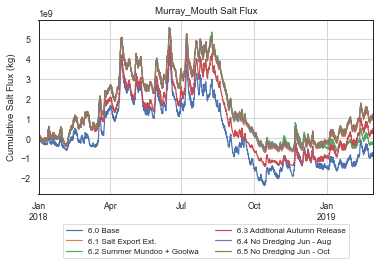

In [139]:
#ts_plot_from_xlsx('../../plots/A4260633_Parnka_Pt_Salt_Flux.json')
ts_plot_from_xlsx('L:\\A11650.L.iat.CoorongRelease\\05_modelling\\post_processing\\output\\python\\ts_plots\\SCN 6\\Murray_Mouth_Salt_Flux.json')